In [3]:
import sys
import numpy as np
import random
import math
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
def appenddata(d):
    x = d[0]
    y = d[1]
    d.append(x*x)
    d.append(y*y)
    d.append(x*y)
    d.append(-x*x-y*y)
    d.append(math.sin(x))
    d.append(math.sin(y))
    d.append(1)

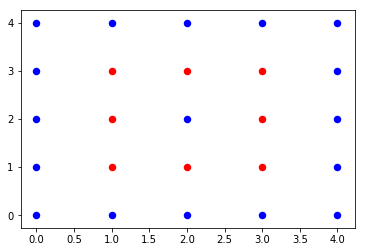

In [11]:
data = []

for x in range(5):
    for y in range(5):
        data.append([x, y])

for d in data:
    appenddata(d)

X = np.array(data)

y = np.array([-1,-1,-1,-1,-1,
              -1, 1, 1, 1,-1,
              -1, 1, -1, 1,-1,
              -1, 1, 1, 1,-1,
              -1,-1,-1,-1,-1])

for d, sample in enumerate(X):
    if y[d] == -1:
        plt.scatter(sample[0], sample[1], s=120, marker=".", linewidths=2,c="blue")
    else:
        plt.scatter(sample[0], sample[1], s=120, marker=".", linewidths=2,c="red")        

In [17]:
def update_weights(X,Y,learning_rate,epochs):
    w = np.zeros(len(X[0]))
    
    for epoch in range(1, epochs):
        for i, x in enumerate(X):
            if Y[i] * np.dot(X[i], w) < 1:
                w = w + learning_rate * X[i] * Y[i] + (-2  * (1 / epoch) * w)
            else:
                w = w + learning_rate * (-2 * (1 / epoch) * w)
        if epoch % 5000 == 0:
            sys.stdout.write("\r{:.2f} %".format(100*epoch/epochs))
            sys.stdout.flush()
            learning_rate *=0.99
            
            
    sys.stdout.write("\r100.00 %")
    sys.stdout.flush()
    return w

In [18]:
w = update_weights(X, y, 0.75, 1000000)

100.00 %

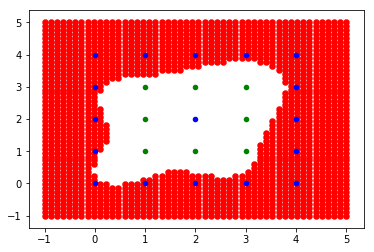

In [19]:
x = np.linspace(-1,5,50)
xx = np.linspace(-1,5,50)
points = []
for i in x:
    for j in xx:
        points.append([i,j])
for p in points:
    appenddata(p)
for x in points:    
    label = np.dot(np.array(x), w)
    if label < 1:
        plt.scatter(x[0], x[1], s=80, marker=".", linewidth=2, c="r")
        

for d, sample in enumerate(X):
    if y[d] == -1:
        plt.scatter(sample[0], sample[1], s=50, marker=".", linewidth=2, c="b")
    else:
        plt.scatter(sample[0], sample[1], s=50, marker=".", linewidth=2, c="g")

plt.show()